In [31]:
from pandas import read_csv
from matplotlib import pyplot
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [181]:
overdoses = pandas.read_csv('overdose_deaths.csv')
overdose_calls = pandas.read_csv('overdose_calls.csv')
medication_treatment = pandas.read_csv('treatment.csv')

In [199]:
buprenorphine = medication_treatment[medication_treatment['metric'] == 'Buprenorphine'].sort_values(by='year')
methadone = medication_treatment[medication_treatment['metric'] == 'Methadone'].sort_values(by='year')
discharges = medication_treatment[medication_treatment['metric'] == 'WM Discharges']
admissions = medication_treatment[medication_treatment['metric'] == 'SUD Residential Treatment Admissions']
naloxone = medication_treatment[medication_treatment['metric'] == 'Naloxone'].sort_values(by='reporting_period_start_date')

In [176]:
smoothed_overdoses = []
months = 3
start_date = datetime(2023,1,1)
for i in range(2023,2025):
    for j in range(1,13):
        if i == 2024 and j == 15 - months:
            break
        date = datetime(i, j, 1)
        agg = 0
        for k in [date + relativedelta(months=l) for l in range(months)]:
            od = overdoses[overdoses['month_start_date'] == k.strftime('%Y/%m/%d')]
            agg += int(od.iloc[0]['total_deaths'])
        smoothed_overdoses.append({'date': date, 'avg_ods': agg / months})

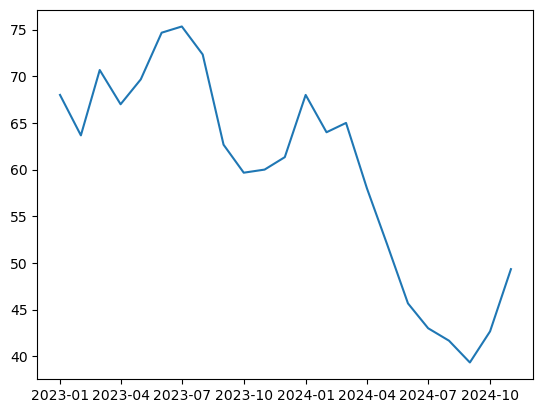

In [177]:
pyplot.plot([i['date'] for i in smoothed_overdoses],[i['avg_ods'] for i in smoothed_overdoses])

In [178]:
smoothed_overdose_calls = []
week_window = 13
start_date = datetime(2023,1,8)
for i in range(len(overdose_calls)-week_window-1):
    agg = 0
    view_date = start_date + relativedelta(weeks=i)
    if view_date + relativedelta(weeks=week_window) > datetime(2025,3,2):
        break
    for k in [view_date + relativedelta(weeks=l) for l in range(week_window)]:
        calls = overdose_calls[overdose_calls['week_start_date'] == k.strftime('%Y/%m/%d')]
        agg += int(calls.iloc[0]['total_overdose_related_911_calls'])
    smoothed_overdose_calls.append({'date': view_date, 'avg_calls': agg / week_window})

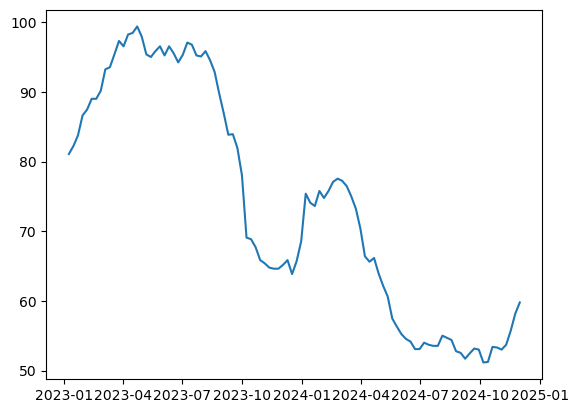

In [179]:
pyplot.plot([i['date'] for i in smoothed_overdose_calls],[i['avg_calls'] for i in smoothed_overdose_calls])

In [215]:
m_baseline = methadone[methadone['reporting_period_start_date'] == '2020/01/01'].iloc[0]
m_baseline_count = int(m_baseline['metric_value'])
methadone_change = [{'start_date': '2020/01/01', 'pct_change': 100}]
for _, row in methadone.iterrows():
    if row['reporting_period_start_date'] != '2020/01/01' and row['reporting_period_type'] == 'Annual (Full)':
        m_treatment_counts = int(row['metric_value'])
        m_pct_change = 100 * (1 + ((m_treatment_counts - m_baseline_count)/m_baseline_count))
        methadone_change.append({'start_date': row['reporting_period_start_date'], 'pct_change': m_pct_change})

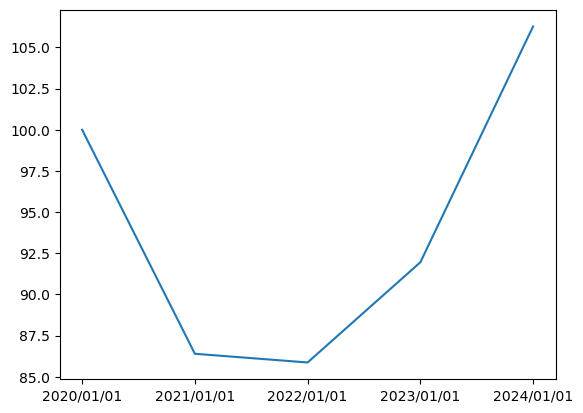

In [219]:
pyplot.plot([i['start_date'] for i in methadone_change], [i['pct_change'] for i in methadone_change])

In [220]:
b_baseline = buprenorphine[buprenorphine['reporting_period_start_date'] == '2020/01/01'].iloc[0]
b_baseline_count = int(b_baseline['metric_value'])
buprenorphine_change = [{'start_date': '2020/01/01', 'pct_change': 100}]
for _, row in buprenorphine.iterrows():
    if row['reporting_period_start_date'] != '2020/01/01' and row['reporting_period_type'] == 'Annual (Full)':
        b_treatment_counts = int(row['metric_value'])
        b_pct_change = 100 * (1 + ((b_treatment_counts - b_baseline_count)/b_baseline_count))
        buprenorphine_change.append({'start_date': row['reporting_period_start_date'], 'pct_change': b_pct_change})

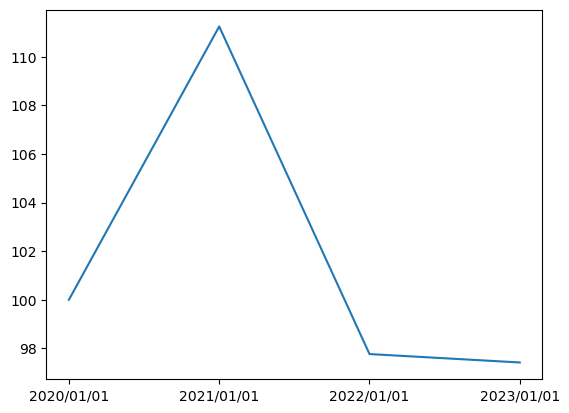

In [221]:
pyplot.plot([i['start_date'] for i in buprenorphine_change], [i['pct_change'] for i in buprenorphine_change])

In [227]:
n_baseline = naloxone[naloxone['reporting_period_start_date'] == '2021/01/01'].iloc[0]
n_baseline_count = int(n_baseline['metric_value'])
naloxone_change = [{'start_date': '2021/01/01', 'pct_change': 100}]
for _, row in naloxone.iterrows():
    if row['reporting_period_start_date'] != '2021/01/01':
        n_treatment_counts = int(row['metric_value'])
        n_pct_change = 100 * (1 + ((n_treatment_counts - n_baseline_count)/n_baseline_count))
        naloxone_change.append({'start_date': row['reporting_period_start_date'], 'pct_change': n_pct_change})

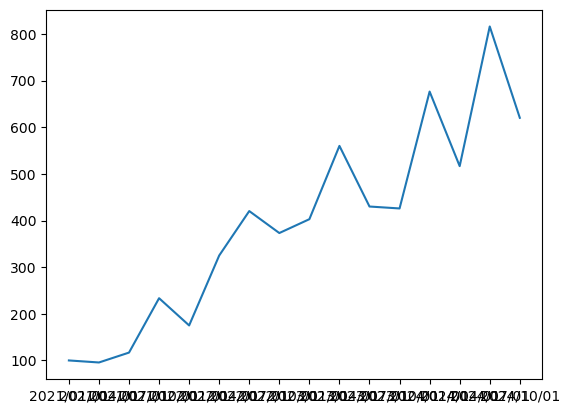

In [239]:
plt = pyplot.plot([i['start_date'] for i in naloxone_change], [i['pct_change'] for i in naloxone_change])
plt

In [250]:
plt[0].set_dashes([1,2,3,4])

TypeError: Line2D.draw() missing 1 required positional argument: 'renderer'

In [243]:
dir(plt[0])

['_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_animated',
 '_antialiased',
 '_axes',
 '_callbacks',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_color',
 '_dash_pattern',
 '_dashcapstyle',
 '_dashjoinstyle',
 '_different_canvas',
 '_drawStyles_l',
 '_drawStyles_s',
 '_drawstyle',
 '_fully_clipped_to_axes',
 '_gapcolor',
 '_get_markerfacecolor',
 '_get_transformed_path',
 '_gid',
 '_in_layout',
 '_internal_update',
 '_invalidx',
 '_invalidy',
 '_label',
 '_lineStyles',
 '_linestyle',
 '_linestyles',
 '_linewidth',
 '_marker',
 '_markeredgecolor',
 '_markeredgewidth',
 '_markerfac